# Data Prep

Building off of the data prep notebook from Assignment 4.
* [EDA](#EDA)
    * [Overview](#Overview)
    * [Count and Distribution](#Count-and-Distribution)
* [Column Transformation](#Column-Transformation)
* [Feature selection](#Feature-Selection)
    * [Variance Threshold](#Variance-Threshold)
    * [Correlation](#Correlation)
    * [ANOVA](#ANOVA)


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [37]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
teledf = pd.read_csv('data/telcomarketing.csv')

## EDA

Exploratory data analysis.

* [Overview](#Overview)
* [Count and Distribution](#Count-and-Distribution)

### Overview

In [39]:
teledf.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [40]:
teledf.shape

(3333, 20)

In [41]:
teledf.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [42]:
teledf.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [43]:
teledf.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### Count and Distribution

Visualized via plots

In [44]:
# seperating variable types in advance
# will also be used in column transformation

cat_var = ['State','Area code']
bin_var = ['International plan', 'Voice mail plan']
target_var = ['Churn']
non_cont = cat_var+bin_var+target_var
cont_var = list(teledf.drop(columns=non_cont).columns)

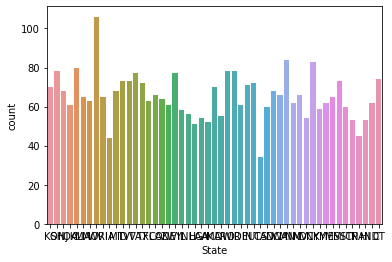

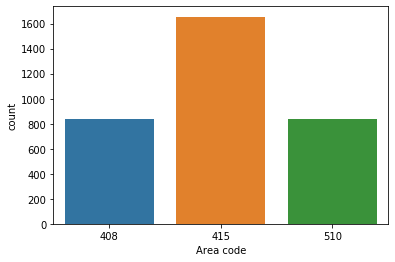

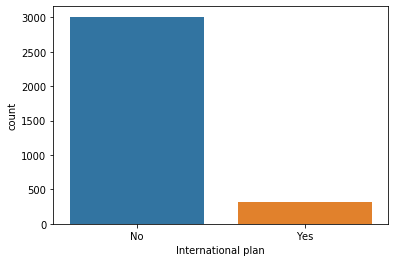

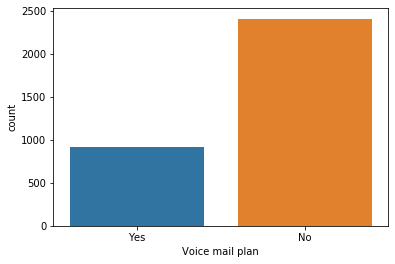

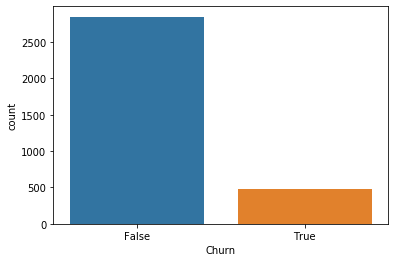

In [45]:
# counts for categorical variables

for i in non_cont:
    sns.countplot(teledf[i])
    plt.show()

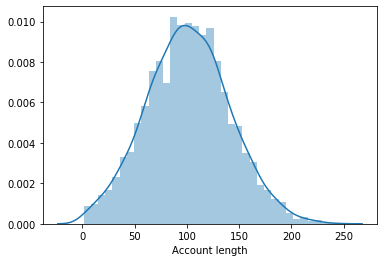

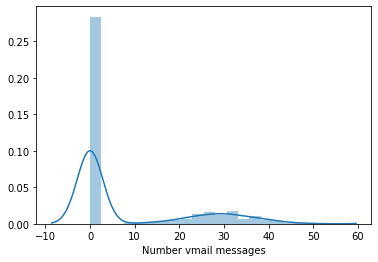

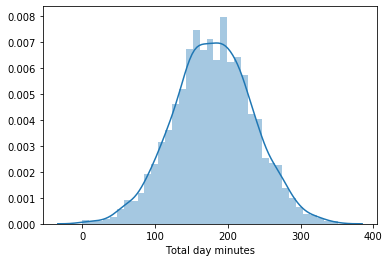

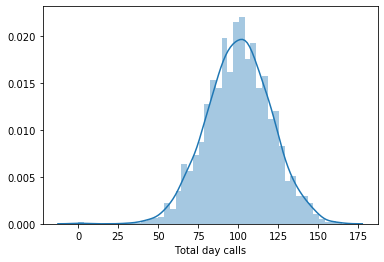

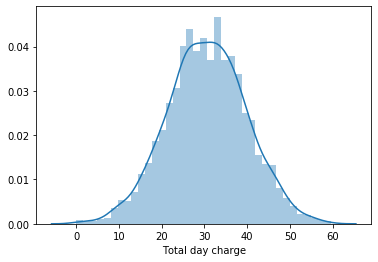

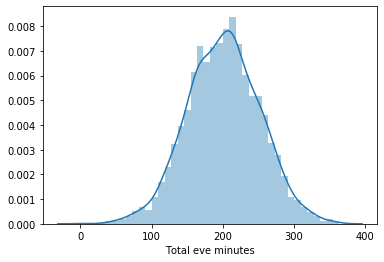

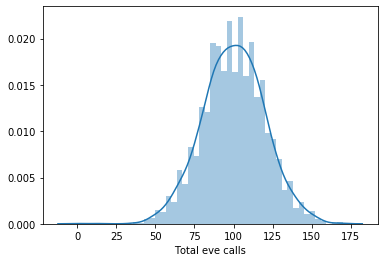

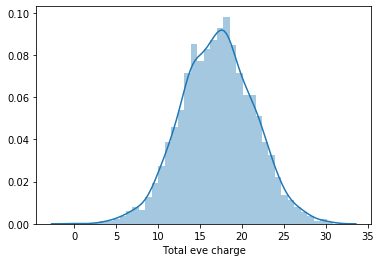

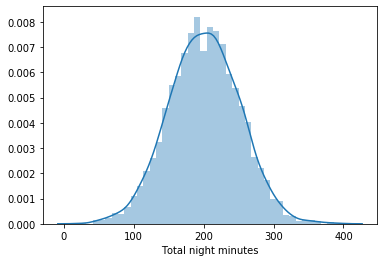

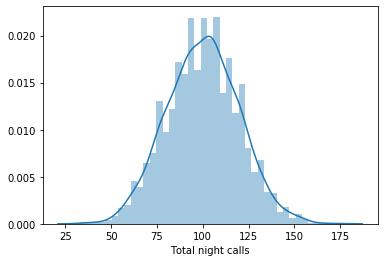

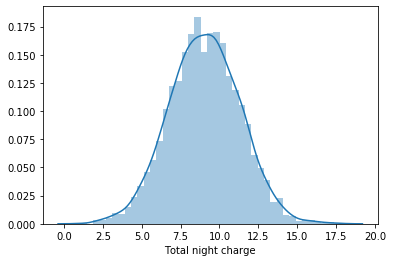

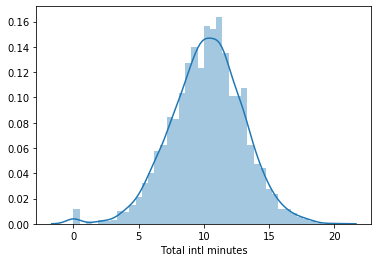

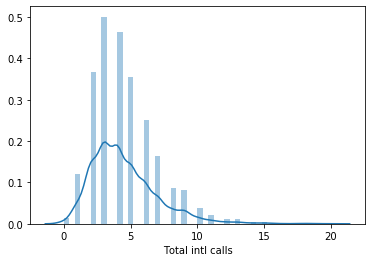

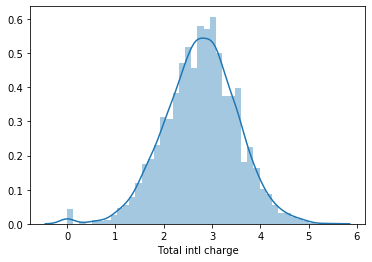

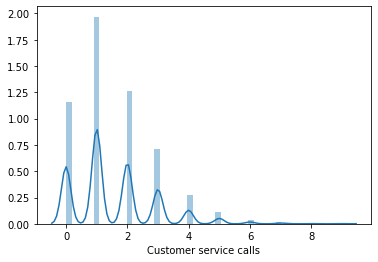

In [46]:
# distribution for continuous variables

for i in cont_var:
    sns.distplot(teledf[i])
    plt.show()

## Column Transformation

In [47]:
# column transformation

data_transformer = ColumnTransformer(transformers=[
    ('cont', 'passthrough', cont_var),
    ('target', 'passthrough', target_var),
    ('binary', OrdinalEncoder(), bin_var),
    ('nominal', OneHotEncoder(sparse=False), cat_var)],
                                      remainder='drop')

In [48]:
data_transformer.fit(teledf)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cont', 'passthrough',
                                 ['Account length', 'Number vmail messages',
                                  'Total day minutes', 'Total day calls',
                                  'Total day charge', 'Total eve minutes',
                                  'Total eve calls', 'Total eve charge',
                                  'Total night minutes', 'Total night calls',
                                  'Total night charge', 'Total intl minutes',
                                  'Tot...ls', 'Total intl charge',
                                  'Customer service calls']),
                                ('target', 'passthrough', ['Churn']),
                                ('binary',
                                 OrdinalEncoder(categories='auto',
                                                dtype=<class 'num

In [49]:
# set up new transformed dataframe

nom_name=data_transformer.named_transformers_['nominal'].categories_

In [50]:
transformed_nomcat = []

for col, name in zip(cat_var, nom_name):
    for i in name:
        transformed_nomcat.append('_'.join([col,str(i)]))

In [51]:
transformed_nomcat

['State_AK',
 'State_AL',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_CT',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MA',
 'State_MD',
 'State_ME',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NH',
 'State_NJ',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA',
 'State_RI',
 'State_SC',
 'State_SD',
 'State_TN',
 'State_TX',
 'State_UT',
 'State_VA',
 'State_VT',
 'State_WA',
 'State_WI',
 'State_WV',
 'State_WY',
 'Area code_408',
 'Area code_415',
 'Area code_510']

In [52]:
teledf_trans = data_transformer.transform(teledf)

In [53]:
trans_col = cont_var+target_var+bin_var+transformed_nomcat

In [54]:
teledf_trans = pd.DataFrame(data=teledf_trans, columns=trans_col)

In [55]:
teledf_trans.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510
0,128.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,107.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,137.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,84.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,75.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# export transformed 

teledf_trans.to_csv('data/teledf.csv', index = False)

## Feature Selection

Via the following methods:
* Variance Threshold
* Correlation
* ANOVA


### Variance Threshold

In [57]:
cat_vt = VarianceThreshold(threshold=0.1)

cat_var_df = teledf_trans[transformed_nomcat + bin_var]
cat_var_df.head()

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_408,Area code_415,Area code_510,International plan,Voice mail plan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [58]:
cat_vt.fit_transform(cat_var_df)
cat_vt.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True])

In [59]:
vt_features = cat_var_df.loc[:,list(cat_vt.get_support())]
vt_features = list(vt_features.columns)
vt_features

# no continuous variables met threshold after testing
# final features are categorical only

['Area code_408', 'Area code_415', 'Area code_510', 'Voice mail plan']

### Correlation

In [60]:
# find top correlations with target

top_5_corr = teledf_trans.corr()['Churn'].abs().sort_values(ascending = False)[:5]
list(top_5_corr.index), top_5_corr

(['Churn',
  'International plan',
  'Customer service calls',
  'Total day minutes',
  'Total day charge'],
 Churn                     1.000000
 International plan        0.259852
 Customer service calls    0.208750
 Total day minutes         0.205151
 Total day charge          0.205151
 Name: Churn, dtype: float64)

In [61]:
corr_features = list(top_5_corr.index)

### ANOVA

In [73]:
# set up train test split

tele_cont=teledf[cont_var]

X_ANOVA = tele_cont
y_ANOVA = teledf_trans.Churn

In [74]:
X_ANOVA_train, X_ANOVA_test, y_ANOVA_train, y_ANOVA_test = train_test_split(X_ANOVA, y_ANOVA, 
                                                                            test_size = 0.2, random_state = 42)

In [75]:
# scale

anovascaler = StandardScaler()

X_ANOVA_train_scaled = anovascaler.fit_transform(X_ANOVA_train)
X_ANOVA_test_scaled = anovascaler.transform(X_ANOVA_test)

In [76]:
#fit

anovaselector = SelectKBest(score_func = f_classif)
anovaselector.fit(X_ANOVA_train_scaled, y_ANOVA_train)

SelectKBest(k=10, score_func=<function f_classif at 0x00000213B1AD17B8>)

In [77]:
# get list of features selected by anova

tele_anova = tele_cont.loc[:,list(anovaselector.get_support())]
anova_features = list(tele_anova.columns)

In [78]:
# keep only selected variables

keep_var = list(set(vt_features + corr_features + anova_features))

In [79]:
teledf_final = teledf_trans[keep_var]
teledf_final.head()

,Total day calls,Total intl charge,International plan,Total eve charge,Area code_408,Area code_415,Total eve minutes,Total intl calls,Total intl minutes,Total day minutes,Number vmail messages,Voice mail plan,Total day charge,Churn,Customer service calls,Area code_510
0,110.0,2.70,0.0,16.78,0.0,1.0,197.4,3.0,10.0,265.1,25.0,1.0,45.07,0.0,1.0,0.0
1,123.0,3.70,0.0,16.62,0.0,1.0,195.5,3.0,13.7,161.6,26.0,1.0,27.47,0.0,1.0,0.0
2,114.0,3.29,0.0,10.30,0.0,1.0,121.2,5.0,12.2,243.4,0.0,0.0,41.38,0.0,0.0,0.0
3,71.0,1.78,1.0,5.26,1.0,0.0,61.9,7.0,6.6,299.4,0.0,0.0,50.90,0.0,2.0,0.0
4,113.0,2.73,1.0,12.61,0.0,1.0,148.3,3.0,10.1,166.7,0.0,0.0,28.34,0.0,3.0,0.0


In [80]:
# export final dataframe after feature selection

teledf_final.to_csv('data/teledf_final.csv')